In [1]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
train_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
train_data = train_data.drop('CustomerID', axis = 1)
train_data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
train_data.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
train_data.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [7]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [8]:
train_data.shape

(440832, 11)

In [9]:
#Dealing with object columns
#checking the unique of object columns

for column in train_data:
    if train_data[column].dtypes=='object':
        print(f'{column}: {train_data[column].unique()}')


Gender: ['Female' 'Male']
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']


In [10]:
# encoding gender column
train_data['Gender'] = train_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [11]:
# using one hot encoding for subscription type and contract length
train_data_preprocessed = pd.get_dummies(data=train_data , columns=['Subscription Type', 'Contract Length'])
train_data_preprocessed

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,False,False,True,True,False,False
1,65.0,0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,True,False,False,False,True,False
2,55.0,0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,True,False,False,False,False,True
3,58.0,1,38.0,21.0,7.0,7.0,396.00,29.0,1.0,False,False,True,False,True,False
4,23.0,1,32.0,20.0,5.0,8.0,617.00,20.0,1.0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,716.38,8.0,0.0,False,True,False,True,False,False
440829,25.0,0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,False,True,False,True,False,False
440830,26.0,1,35.0,27.0,1.0,5.0,977.31,9.0,0.0,False,False,True,False,False,True
440831,28.0,1,55.0,14.0,2.0,0.0,602.55,2.0,0.0,False,False,True,False,False,True


Display of dataset variance


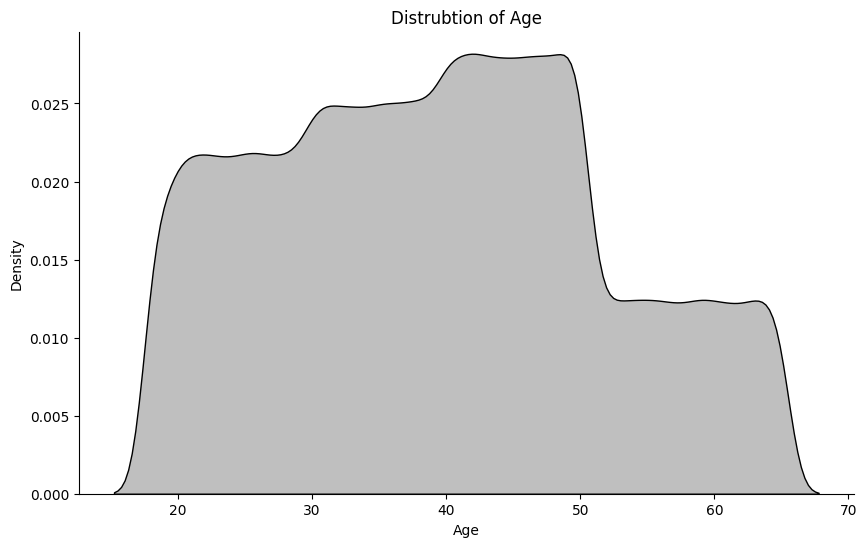

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=train_data_preprocessed, x='Age', fill=True, color='black')
plt.title('Distrubtion of Age')
sns.despine()

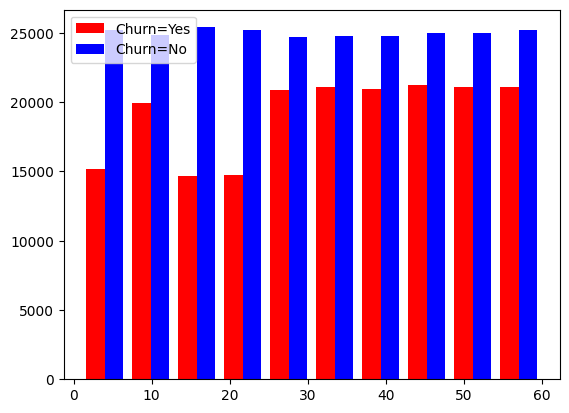

In [14]:
tenure_churn_no = train_data[train_data.Churn==0].Tenure
tenure_churn_yes = train_data[train_data.Churn==1].Tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red', 'blue'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

Building an ANN model


In [16]:
#defining input and output variables
x = train_data_preprocessed.drop('Churn', axis=1)
y = train_data_preprocessed['Churn']

In [17]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
#Scale data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
x_train.shape

(330624, 14)

In [21]:
#creating our ANN model
model = keras.Sequential([
    keras.layers.Dense(2560, input_shape=(14,), activation='relu'),
    keras.layers.Dense(1280, activation='relu'),
    keras.layers.Dense(640, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9911 - val_loss: 0.0276
Epoch 2/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9900 - loss: 0.0297 - val_accuracy: 0.9897 - val_loss: 0.0300
Epoch 3/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9891 - val_loss: 0.0367
Epoch 4/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9922 - loss: 0.0235 - val_accuracy: 0.9925 - val_loss: 0.0215
Epoch 5/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9928 - val_loss: 0.0236
Epoch 6/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9935 - val_loss: 0.0201
Epoch 7/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9926 - val_loss: 0.0230
Epoch 8/20
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 

In [25]:
model.save('churn.h5')

In [48]:
import pandas as pd
test_data1 = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
test_data1

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,57,Female,46,19,3,5,Premium,Monthly,553.00,30,1
1,2,63,Male,39,20,3,8,Premium,Annual,165.00,27,1
2,3,42,Female,58,1,3,10,Standard,Quarterly,733.00,2,0
3,4,32,Female,2,10,3,16,Basic,Quarterly,103.00,3,1
4,5,42,Male,45,28,4,30,Premium,Monthly,335.00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84818,84819,61,Female,7,7,8,9,Basic,Monthly,168.69,3,1
84819,84820,61,Female,19,15,8,30,Standard,Quarterly,217.54,30,1
84820,84821,40,Male,21,3,6,27,Premium,Monthly,481.04,2,1
84821,84822,43,Female,58,30,4,3,Standard,Monthly,840.11,14,1


In [49]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84823 entries, 0 to 84822
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         84823 non-null  int64  
 1   Age                84823 non-null  int64  
 2   Gender             84823 non-null  object 
 3   Tenure             84823 non-null  int64  
 4   Usage Frequency    84823 non-null  int64  
 5   Support Calls      84823 non-null  int64  
 6   Payment Delay      84823 non-null  int64  
 7   Subscription Type  84823 non-null  object 
 8   Contract Length    84823 non-null  object 
 9   Total Spend        84823 non-null  float64
 10  Last Interaction   84823 non-null  int64  
 11  Churn              84823 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 7.8+ MB


In [50]:
test_data1 = test_data1.drop('CustomerID', axis = 1)
test_data1

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,57,Female,46,19,3,5,Premium,Monthly,553.00,30,1
1,63,Male,39,20,3,8,Premium,Annual,165.00,27,1
2,42,Female,58,1,3,10,Standard,Quarterly,733.00,2,0
3,32,Female,2,10,3,16,Basic,Quarterly,103.00,3,1
4,42,Male,45,28,4,30,Premium,Monthly,335.00,6,1
...,...,...,...,...,...,...,...,...,...,...,...
84818,61,Female,7,7,8,9,Basic,Monthly,168.69,3,1
84819,61,Female,19,15,8,30,Standard,Quarterly,217.54,30,1
84820,40,Male,21,3,6,27,Premium,Monthly,481.04,2,1
84821,43,Female,58,30,4,3,Standard,Monthly,840.11,14,1


In [51]:
test_data1.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,84823.000000,84823.000000,84823.000000,84823.000000,84823.000000,84823.000000,84823.000000,84823.000000
mean,41.630772,30.512396,15.411622,5.085861,15.119119,544.791142,15.549426,0.984403
std,13.913149,17.378557,8.665862,3.152640,8.967374,260.005733,8.647808,0.123912
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,15.000000,8.000000,2.000000,7.000000,319.430000,8.000000,1.000000
50%,42.000000,31.000000,15.000000,5.000000,15.000000,540.720000,16.000000,1.000000
75%,54.000000,46.000000,23.000000,8.000000,23.000000,769.600000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [52]:
test_data1.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [53]:
test_data1.shape

(84823, 11)

In [54]:
#Dealing with object columns
#checking the unique of object columns

for column in test_data1:
    if test_data1[column].dtypes=='object':
        print(f'{column}: {test_data1[column].unique()}')

Gender: ['Female' 'Male']
Subscription Type: ['Premium' 'Standard' 'Basic']
Contract Length: ['Monthly' 'Annual' 'Quarterly']


In [55]:
# encoding gender column
test_data1['Gender'] = test_data1['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [56]:
# using one hot encoding for subscription type and contract length
test_data_preprocessed = pd.get_dummies(data=test_data1 , columns=['Subscription Type', 'Contract Length'])
test_data_preprocessed

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,57,0,46,19,3,5,553.00,30,1,False,True,False,False,True,False
1,63,1,39,20,3,8,165.00,27,1,False,True,False,True,False,False
2,42,0,58,1,3,10,733.00,2,0,False,False,True,False,False,True
3,32,0,2,10,3,16,103.00,3,1,True,False,False,False,False,True
4,42,1,45,28,4,30,335.00,6,1,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84818,61,0,7,7,8,9,168.69,3,1,True,False,False,False,True,False
84819,61,0,19,15,8,30,217.54,30,1,False,False,True,False,False,True
84820,40,1,21,3,6,27,481.04,2,1,False,True,False,False,True,False
84821,43,0,58,30,4,3,840.11,14,1,False,False,True,False,True,False


In [57]:
#defining input and output variables
x_evaluate = test_data_preprocessed.drop('Churn', axis=1)
y_evaluate = test_data_preprocessed['Churn']

In [58]:


# Now try evaluating the model again
model.evaluate(x_evaluate, y_evaluate)

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9694 - loss: 2455.9094


[1252.357421875, 0.9844028353691101]

In [59]:
y_predict = model.predict(x_evaluate)

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [63]:
y_evaluate[:5]

,Churn
0,1
1,1
2,0
3,1
4,1


In [64]:
y_predict[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [65]:
y_pred_num =[]
for element in y_predict:
    if element > 0.5:
        y_pred_num.append(1)
    else:
        y_pred_num.append(0)

In [66]:
print(classification_report(y_evaluate, y_pred_num))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1323
           1       0.98      1.00      0.99     83500

    accuracy                           0.98     84823
   macro avg       0.49      0.50      0.50     84823
weighted avg       0.97      0.98      0.98     84823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
